# Task 2: User Engagement Analaysis

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from assistant_functions import Assistants
import plotter

In [4]:
#Import the cleaned dataframe into the current workspace
assistant = Assistants()
cleaned_csv_path = '../data/cleaned_data.csv'
df = assistant.read_csv(csv_path = cleaned_csv_path)
df.head()

file read as csv


bearer_id                start  start_ms                  end  end_ms  \
0  1.311448e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   662.0   
1  1.311448e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   606.0   
2  1.311448e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   652.0   
3  1.311448e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   171.0   
4  1.311448e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   954.0   

   dur._(ms)          imsi  msisdn/number          imei  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      last_location_name  ...  total_ul_(bytes)  total_dl_(bytes)  \
0  9.16456699548519E+015  ...        36749741.0       308879636.0   
1                L77566A  ...        53800391.0       653384965.0   
2                D42335A  ...        27883638.0       279807335.0   
3                T21824A  ...        43324218.0       846028530.0   
4                D88865A  ...        38542814.0       569138589.0   

   social_media      google      email     youtube     netflix       gaming  \
0     1570185.0   2905912.0  3701304.0  18355943.0  17855187.0  292426453.0   
1     1933278.0   4414096.0   937385.0  39359124.0  35565545.0  609920783.0   
2     1726277.0  10229119.0  3363124.0  34425237.0  23751202.0  229980251.0   
3      657493.0  11811761.0  2070983.0  36534765.0  15092588.0  810387875.0   
4      912788.0   7748843.0  2110349.0  34222253.0  17539799.0  531237049.0   

         other   total_data  
0  180558843.0  345629377.0  
1  541959383.0  707185356.0  
2  414908351.0  307690973.0  
3  761837216.0  889352748.0  
4  564619822.0  607681403.0  

[5 rows x 53 columns]

In [5]:
#Rename msisdn/number and dur._(ms)
df = df.rename(columns = {'msisdn/number':'msisdn','dur._(ms)':'duration'})
#See the improvement
df.head()

bearer_id                start  start_ms                  end  end_ms  \
0  1.311448e+19  2019-04-04 12:01:00     770.0  2019-04-25 14:35:00   662.0   
1  1.311448e+19  2019-04-09 13:04:00     235.0  2019-04-25 08:15:00   606.0   
2  1.311448e+19  2019-04-09 17:42:00       1.0  2019-04-25 11:58:00   652.0   
3  1.311448e+19  2019-04-10 00:31:00     486.0  2019-04-25 07:36:00   171.0   
4  1.311448e+19  2019-04-12 20:10:00     565.0  2019-04-25 10:40:00   954.0   

    duration          imsi        msisdn          imei     last_location_name  \
0  1823652.0  2.082014e+14  3.366496e+10  3.552121e+13  9.16456699548519E+015   
1  1365104.0  2.082019e+14  3.368185e+10  3.579401e+13                L77566A   
2  1361762.0  2.082003e+14  3.376063e+10  3.528151e+13                D42335A   
3  1321509.0  2.082014e+14  3.375034e+10  3.535661e+13                T21824A   
4  1089009.0  2.082014e+14  3.369980e+10  3.540701e+13                D88865A   

   ...  total_ul_(bytes)  total_dl_(bytes)  social_media      google  \
0  ...        36749741.0       308879636.0     1570185.0   2905912.0   
1  ...        53800391.0       653384965.0     1933278.0   4414096.0   
2  ...        27883638.0       279807335.0     1726277.0  10229119.0   
3  ...        43324218.0       846028530.0      657493.0  11811761.0   
4  ...        38542814.0       569138589.0      912788.0   7748843.0   

       email     youtube     netflix       gaming        other   total_data  
0  3701304.0  18355943.0  17855187.0  292426453.0  180558843.0  345629377.0  
1   937385.0  39359124.0  35565545.0  609920783.0  541959383.0  707185356.0  
2  3363124.0  34425237.0  23751202.0  229980251.0  414908351.0  307690973.0  
3  2070983.0  36534765.0  15092588.0  810387875.0  761837216.0  889352748.0  
4  2110349.0  34222253.0  17539799.0  531237049.0  564619822.0  607681403.0  

[5 rows x 53 columns]

In [6]:
#Generate general information about the dataframe using info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146891 entries, 0 to 146890
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146891 non-null  float64
 1   start                           146891 non-null  object 
 2   start_ms                        146891 non-null  float64
 3   end                             146891 non-null  object 
 4   end_ms                          146891 non-null  float64
 5   duration                        146891 non-null  float64
 6   imsi                            146891 non-null  float64
 7   msisdn                          146891 non-null  float64
 8   imei                            146891 non-null  float64
 9   last_location_name              146891 non-null  object 
 10  avg_rtt_dl_(ms)                 146891 non-null  float64
 11  avg_rtt_ul_(ms)                 146891 non-null  float64
 12  avg_bearer_tp_dl

User engagement analysis is tobe done per user so we need to aggregate the user data for the following metrices:               
    1)session frequency                                                                                                         
    2)the duration of the session                                                                                               
    3)the session total traffic(UL AND DL)                        

#### Session Frequency

In [7]:
aggregate_by_session_count = df.groupby('msisdn').agg({'bearer_id':'count'})
session_frequency_metrics = aggregate_by_session_count.sort_values(by = ['bearer_id'], ascending = False)
session_frequency_metrics.head()

bearer_id
msisdn                 
3.362632e+10         18
3.361489e+10         17
3.362578e+10         17
3.365973e+10         16
3.367588e+10         15

#### Total Duration of Customers

In [8]:
aggregate_by_duration = df.groupby('msisdn').agg({'duration':'sum'})
duration_metrics = aggregate_by_duration.sort_values(by = ['duration'], ascending = False)
duration_metrics.head()

duration
msisdn                  
3.362578e+10  18553754.0
3.361489e+10   9966898.0
3.376054e+10   9279434.0
3.362632e+10   8791927.0
3.366716e+10   8744914.0

#### Sessions total traffic download

In [9]:
aggregate_by_traffic = df.groupby('msisdn').agg({'total_data':'sum'})
total_traffic_metrics = aggregate_by_traffic.sort_values(by = ['total_data'], ascending = False)
total_traffic_metrics.head()

total_data
msisdn                    
3.361489e+10  8.846226e+09
3.376054e+10  8.514774e+09
3.362578e+10  8.499621e+09
3.362632e+10  7.971167e+09
3.367588e+10  7.891111e+09

Therefore we can now make up enaggement dataframe which is composed of session frequency, session duration and session total traffic...

In [10]:
users_engagement_metrics = df.groupby('msisdn').agg({'bearer_id':'count', 'duration':'sum','total_data':'sum'})
users_engagement_metrics = users_engagement_metrics.sort_values(by = ['bearer_id'], ascending = False)
users_engagement_metrics.head(10)

bearer_id    duration    total_data
msisdn                                           
3.362632e+10         18   8791927.0  7.971167e+09
3.361489e+10         17   9966898.0  8.846226e+09
3.362578e+10         17  18553754.0  8.499621e+09
3.365973e+10         16   4035428.0  7.705863e+09
3.367588e+10         15   4865947.0  7.891111e+09
3.376054e+10         15   9279434.0  8.514774e+09
3.366716e+10         13   8744914.0  5.618394e+09
3.360313e+10         12   6287761.0  4.976195e+09
3.376041e+10         12   5321667.0  7.132371e+09
3.362708e+10         12   4703516.0  5.754731e+09

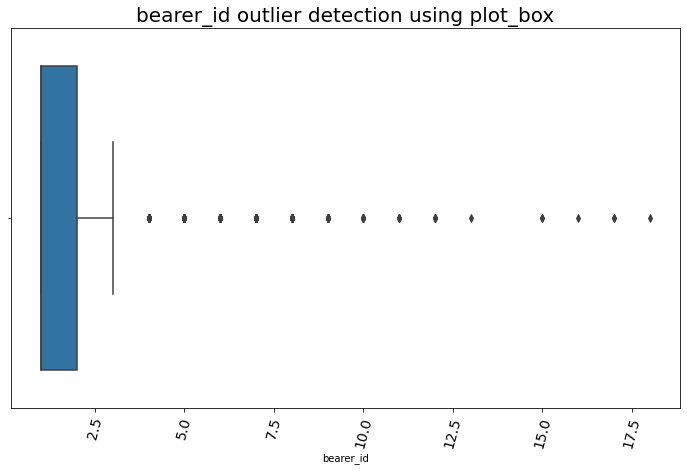

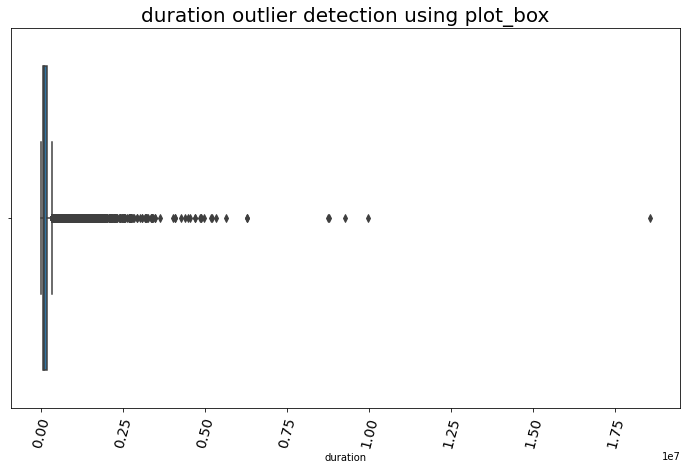

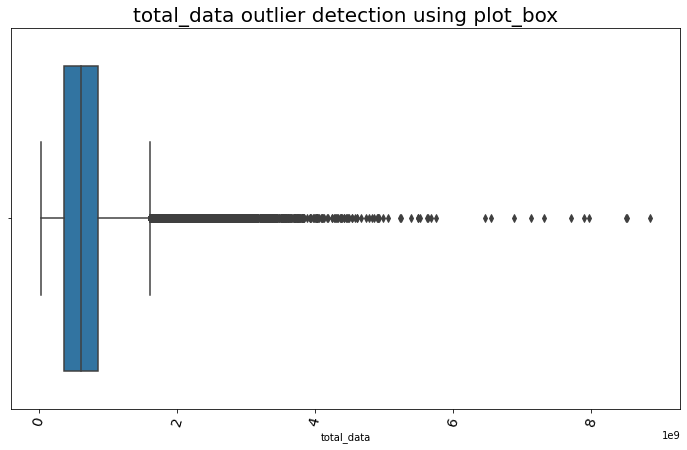

In [11]:
# Outlier detection using plot box from plotter functions...
col_list = ['bearer_id','duration','total_data']
for col in col_list:
    title = f'{col} outlier detection using plot_box'
    plotter.plot_box(users_engagement_metrics, col, title)

In [12]:
#The plots above clearly show that the datdframe needs outlier handling steps...
users_engagement_metrics = assistant.handle_outliers(users_engagement_metrics, 'bearer_id')
users_engagement_metrics = assistant.handle_outliers(users_engagement_metrics, 'duration')
users_engagement_metrics = assistant.handle_outliers(users_engagement_metrics, 'total_data')
users_engagement_metrics.head()

bearer_id  duration    total_data
msisdn                                         
3.362632e+10        3.5  322904.0  1.604259e+09
3.361489e+10        3.5  322904.0  1.604259e+09
3.362578e+10        3.5  322904.0  1.604259e+09
3.365973e+10        3.5  322904.0  1.604259e+09
3.367588e+10        3.5  322904.0  1.604259e+09

In [13]:
users_engagement_metrics.describe()

bearer_id       duration    total_data
count  105719.000000  105719.000000  1.057190e+05
mean        1.356634  130349.580378  6.622830e+08
std         0.650007   87018.309018  3.947117e+08
min         1.000000    7142.000000  3.324901e+07
25%         1.000000   72729.000000  3.579501e+08
50%         1.000000  103111.000000  6.169335e+08
75%         2.000000  172799.000000  8.564738e+08
max         3.500000  322904.000000  1.604259e+09

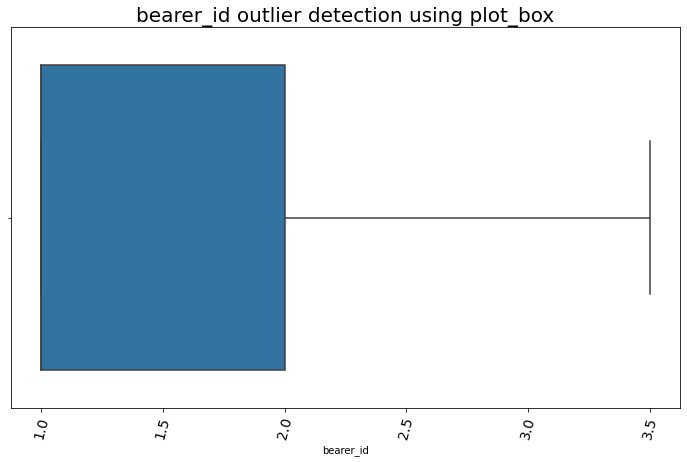

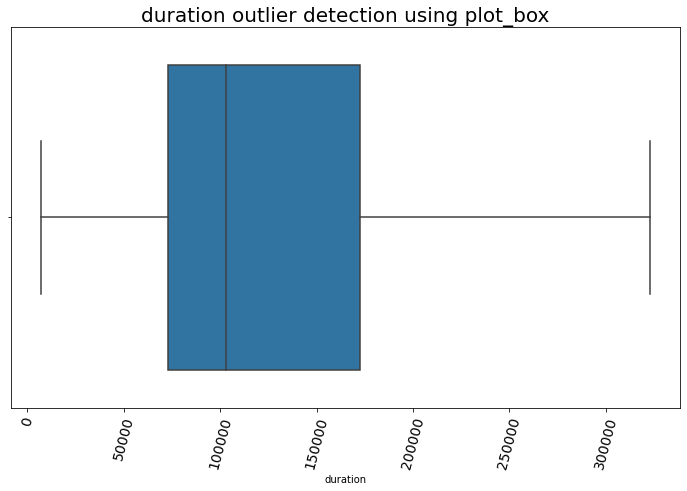

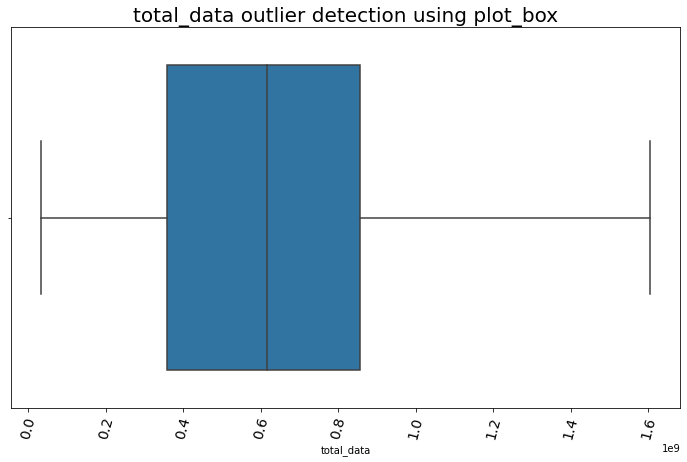

In [14]:
#Rechack for outliers using plot box....
col_list = ['bearer_id','duration','total_data']
for col in col_list:
    title = f'{col} outlier detection using plot_box'
    plotter.plot_box(users_engagement_metrics, col, title)

### Normalization

In [15]:
from sklearn.preprocessing import Normalizer, MinMaxScaler
from sklearn.cluster import KMeans

In [16]:
normalized_user_engagement_metrics = assistant.normalizer(users_engagement_metrics, ['bearer_id', 'duration', 'total_data'])
normalized_user_engagement_metrics.describe()

bearer_id       duration    total_data
count  1.057190e+05  105719.000000  1.057190e+05
mean   2.837243e-09       0.000281  9.999999e-01
std    2.272614e-09       0.000320  3.560448e-07
min    1.051789e-09       0.000008  9.999808e-01
25%    1.494117e-09       0.000112  9.999999e-01
50%    2.052769e-09       0.000195  1.000000e+00
75%    3.142538e-09       0.000319  1.000000e+00
max    3.007606e-08       0.006194  1.000000e+00

<Figure size 648x504 with 0 Axes>

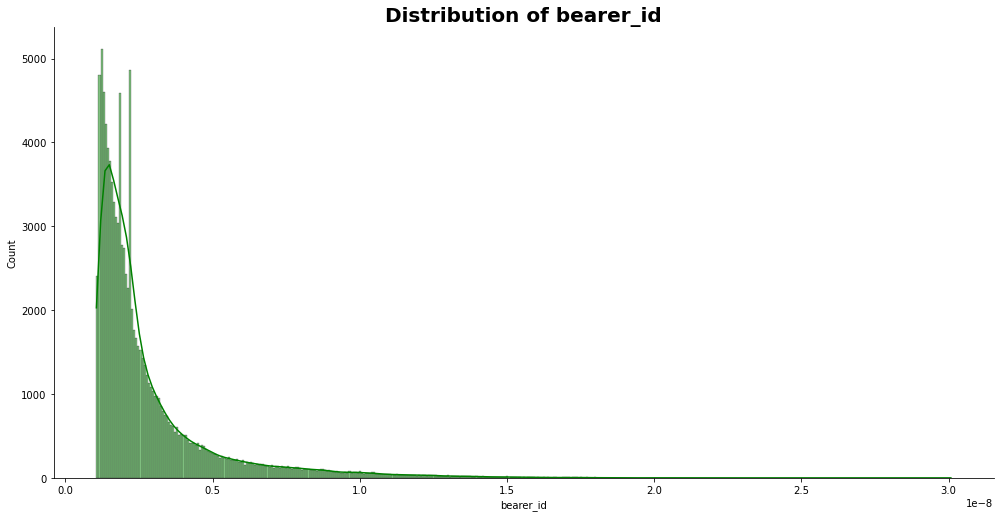

<Figure size 648x504 with 0 Axes>

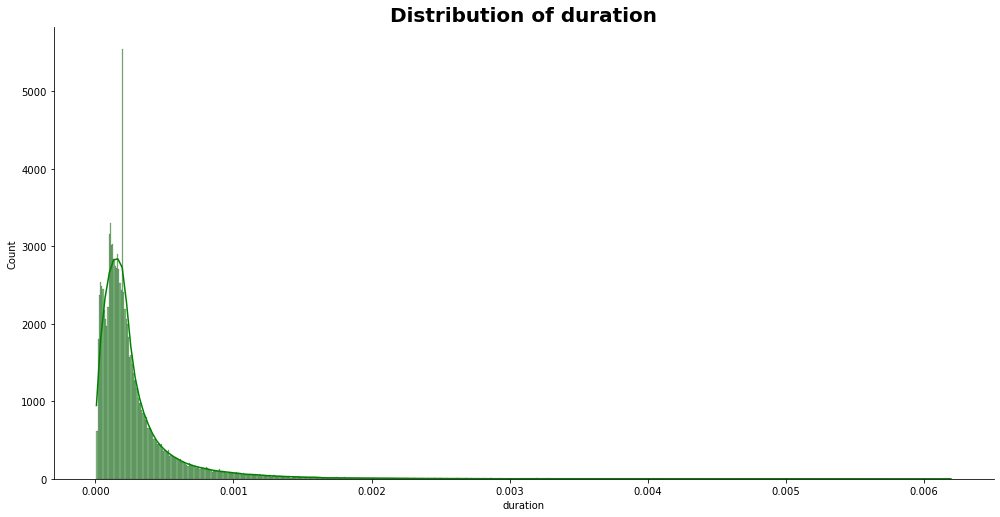

<Figure size 648x504 with 0 Axes>

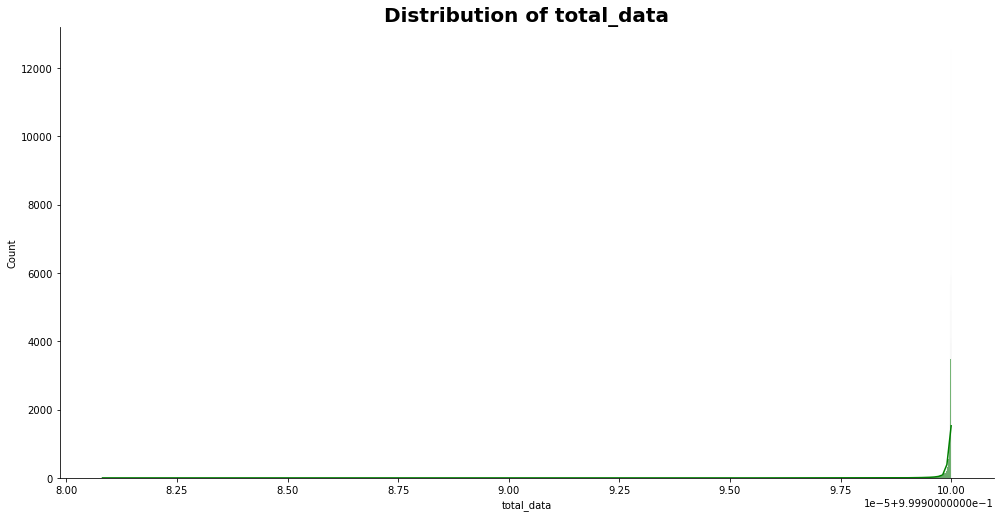

In [17]:
#Plot the distribution of each of the data ...
col_list = ['bearer_id','duration','total_data']
for col in col_list:
    plotter.plot_hist(normalized_user_engagement_metrics, col, 'green')

In [18]:
normalized_user_engagement_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105719 entries, 0 to 105718
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bearer_id   105719 non-null  float64
 1   duration    105719 non-null  float64
 2   total_data  105719 non-null  float64
dtypes: float64(3)
memory usage: 2.4 MB


#### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

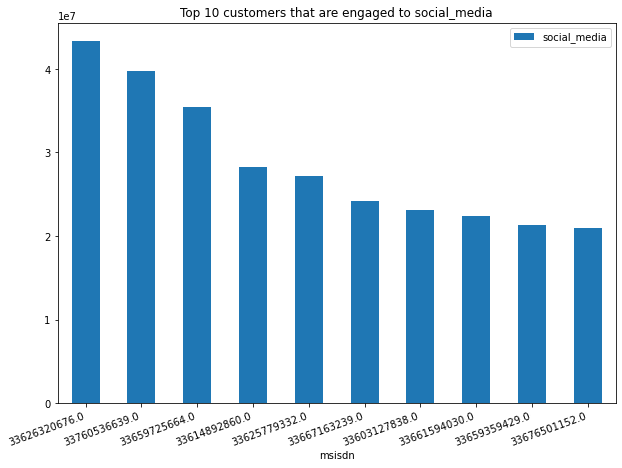

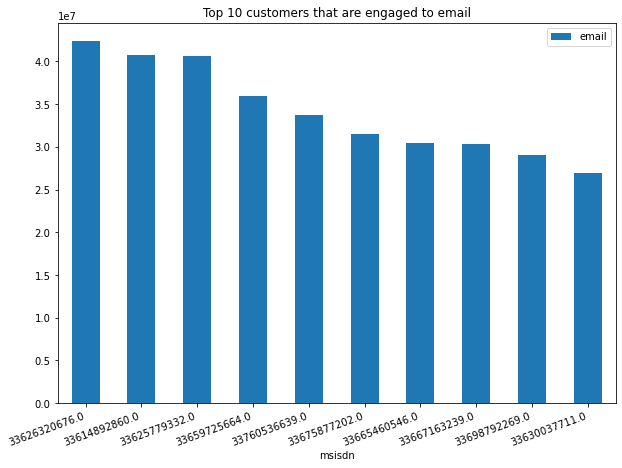

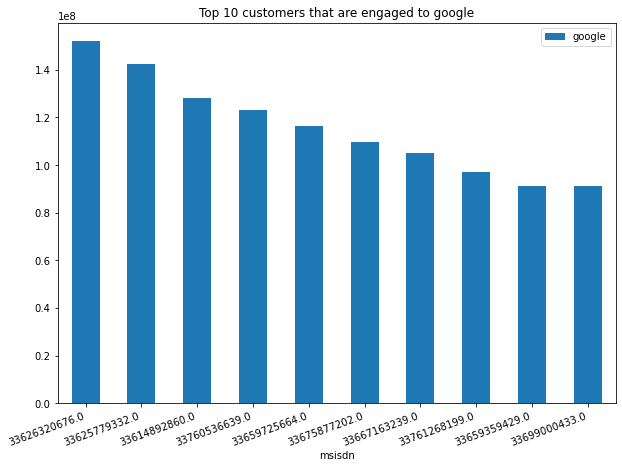

In [19]:
# TOP 10 CUSTOMERS AS PER THE ENGAGEMENT METRIC
# The plots below show the scores of the top 10 customers a function of the columns in the "users_engagement_metrics" which are
   #1) bearer_id -- stands for an aggregated session frequency of a user identified by msisdn(cutomer id)
   #2) duraton -- stands for the aggregated session duration of user identified by msisdn(customer id)
   #3) total_data -- stands for the aggregated total data exchanged by a user identified by msisdn(customer id)
    
app_cols = ['social_media', 'email', 'google']

for app in app_cols:
    
    app_agg = df.groupby('msisdn').agg({app : 'sum'})
    top_app_users = app_agg.sort_values(by=[app], ascending=False).head(10)
    ax = top_app_users.plot.bar(
        y=[app], 
        title=f"Top 10 customers that are engaged to {app}",
        figsize=(10,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()

#### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.

In [20]:
# Therefore in this section I will be clutering the data using the most widely user unsupervised learning mechanism called the K-Means clustering using fundtions of the three engagemnet descriptors.
# Defining K-means model for our case

kmeans = KMeans(n_clusters = 3, init = 'k-means++').fit(normalized_user_engagement_metrics)
predictions = kmeans.predict(normalized_user_engagement_metrics)

#Append the prediction clusters to the data frame
users_engagement_metrics_with_cluster = users_engagement_metrics.copy()
users_engagement_metrics_with_cluster["cluster"] = predictions
users_engagement_metrics_with_cluster['cluster'].head()

msisdn
3.362632e+10    0
3.361489e+10    0
3.362578e+10    0
3.365973e+10    0
3.367588e+10    0
Name: cluster, dtype: int32

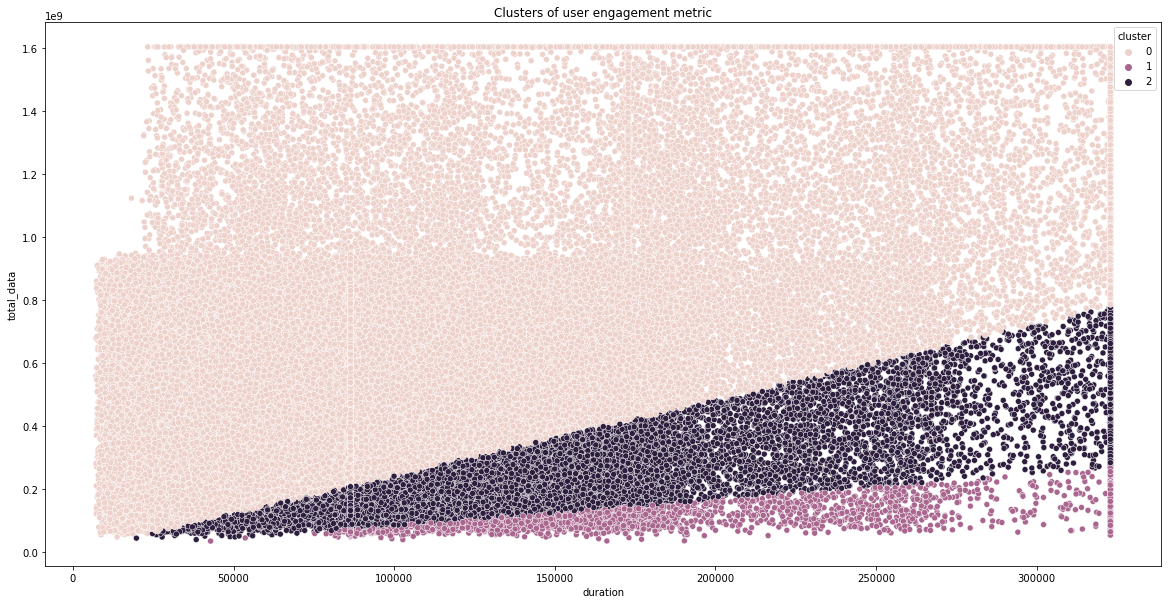

0    87705
2    15631
1     2383
Name: cluster, dtype: int64

In [21]:
# labels = ['cluser_1', 'cluser_2', 'cluser_3']

users_engagement_metrics_with_cluster["cluster"].value_counts()

plt.figure(figsize=(20,10))

sns.scatterplot(x = 'duration', y='total_data',
                hue='cluster', data=users_engagement_metrics_with_cluster).set_title('Clusters of user engagement metric')

plt.show()
# engagment_metrics_with_cluster.describe()
users_engagement_metrics_with_cluster["cluster"].value_counts()

In [22]:
# Now having the three engagement clusters we can save our csv file...
assistant.save_csv(users_engagement_metrics_with_cluster, "../data/user_engagement_cluster.csv")

File Successfully Saved.!!!


bearer_id  duration    total_data  cluster
msisdn                                                  
3.362632e+10        3.5  322904.0  1.604259e+09        0
3.361489e+10        3.5  322904.0  1.604259e+09        0
3.362578e+10        3.5  322904.0  1.604259e+09        0
3.365973e+10        3.5  322904.0  1.604259e+09        0
3.367588e+10        3.5  322904.0  1.604259e+09        0
...                 ...       ...           ...      ...
3.366067e+10        1.0   86083.0  8.671079e+08        0
3.366067e+10        1.0   78141.0  7.265688e+08        0
3.366067e+10        1.0  246143.0  7.997736e+08        0
3.366067e+10        1.0  270134.0  2.703397e+08        2
3.370000e+14        1.0  253030.0  5.962878e+08        2

[105719 rows x 4 columns]

In [23]:
# Further descriptions on the clusters...
cluster_avg = users_engagement_metrics_with_cluster.groupby('cluster').agg({'bearer_id':'mean', 
                                                       'duration':'mean', 'total_data': 'mean'})

In [24]:
print("The mean of each metrics for per cluster")
cluster_avg

The mean of each metrics for per cluster


bearer_id       duration    total_data
cluster                                        
0         1.405365  122253.527302  7.459669e+08
1         1.018884  194133.220730  1.154756e+08
2         1.134700  166052.217452  2.760983e+08

In [25]:
cluster_median = users_engagement_metrics_with_cluster.groupby('cluster').agg({'bearer_id':'median','duration':'median','total_data':'median'})

In [26]:
print("The median of each metrics for per cluster")
cluster_median

The median of each metrics for per cluster


bearer_id  duration   total_data
cluster                                  
0              1.0   93603.0  696483105.0
1              1.0  173795.0  105504047.0
2              1.0  151391.0  230065552.0

#### Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.

In [27]:
print("Describing cluser 1 ")
print("======================")
cluser_1 =  users_engagement_metrics_with_cluster[users_engagement_metrics_with_cluster['cluster'] == 0]
cluser_1.describe()

Describing cluser 1 


bearer_id       duration    total_data  cluster
count  87705.000000   87705.000000  8.770500e+04  87705.0
mean       1.405365  122253.527302  7.459669e+08      0.0
std        0.686016   86581.409448  3.762077e+08      0.0
min        1.000000    7142.000000  4.604748e+07      0.0
25%        1.000000   58209.000000  4.741372e+08      0.0
50%        1.000000   93603.000000  6.964831e+08      0.0
75%        2.000000  170079.000000  8.959173e+08      0.0
max        3.500000  322904.000000  1.604259e+09      0.0

In [28]:
print("Describing cluser 2 ")
print("======================")
cluser_1 =  users_engagement_metrics_with_cluster[users_engagement_metrics_with_cluster['cluster'] == 1]
cluser_1.describe()

Describing cluser 2 


bearer_id       duration    total_data  cluster
count  2383.000000    2383.000000  2.383000e+03   2383.0
mean      1.018884  194133.220730  1.154756e+08      1.0
std       0.136143   70347.619396  4.492615e+07      0.0
min       1.000000   42856.000000  3.324901e+07      1.0
25%       1.000000  141528.000000  8.244049e+07      1.0
50%       1.000000  173795.000000  1.055040e+08      1.0
75%       1.000000  247285.500000  1.351684e+08      1.0
max       2.000000  322904.000000  2.655309e+08      1.0

In [29]:
print("Describing cluser 3 ")
print("======================")
cluser_1 =  users_engagement_metrics_with_cluster[users_engagement_metrics_with_cluster['cluster'] == 2]
cluser_1.describe()

Describing cluser 3 


bearer_id       duration    total_data  cluster
count  15631.000000   15631.000000  1.563100e+04  15631.0
mean       1.134700  166052.217452  2.760983e+08      2.0
std        0.366341   78330.800704  1.589577e+08      0.0
min        1.000000   19764.000000  3.802236e+07      2.0
25%        1.000000   96834.500000  1.557178e+08      2.0
50%        1.000000  151391.000000  2.300656e+08      2.0
75%        1.000000  215110.000000  3.543393e+08      2.0
max        3.500000  322904.000000  7.775171e+08      2.0

#### Aggregate user total traffic per application and derive the top 10 most engaged users per application

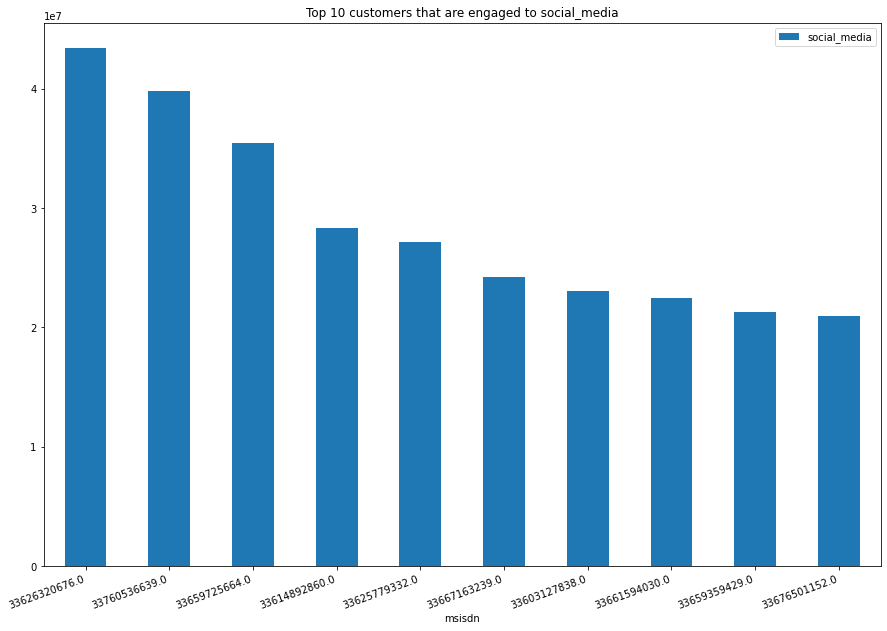

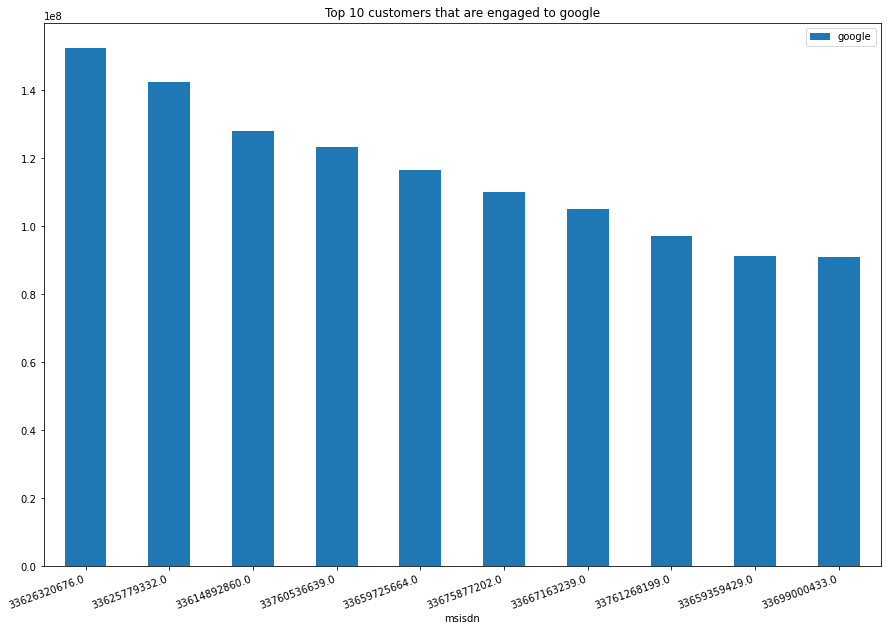

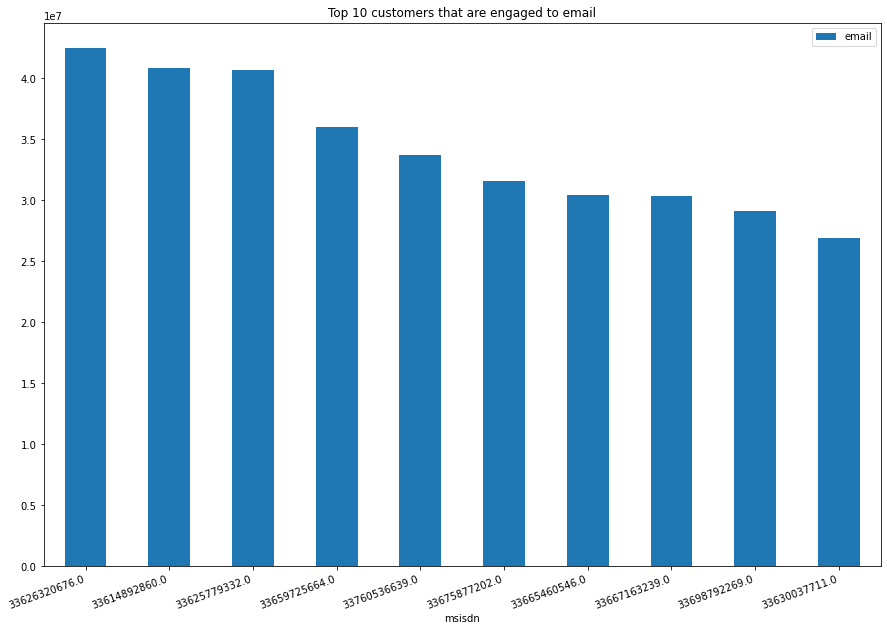

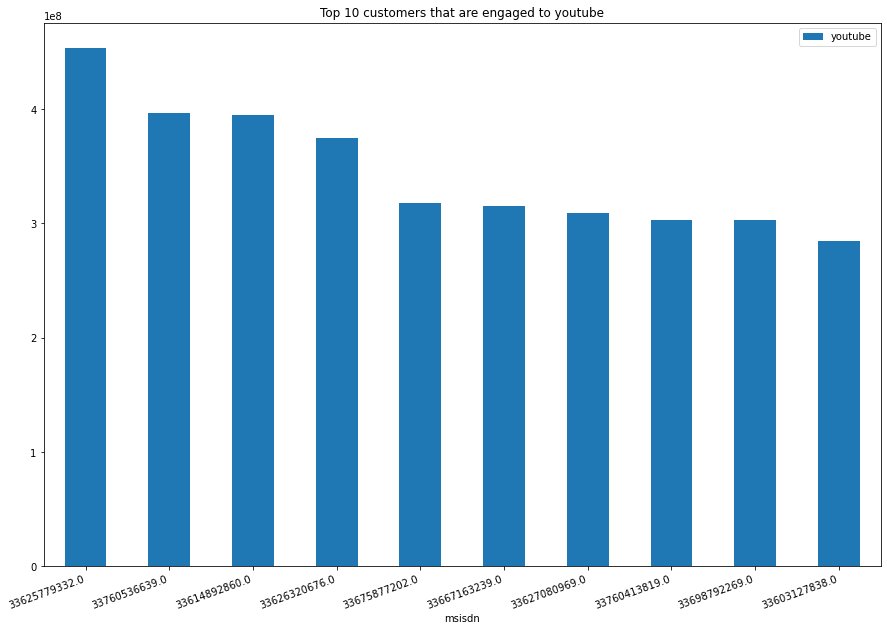

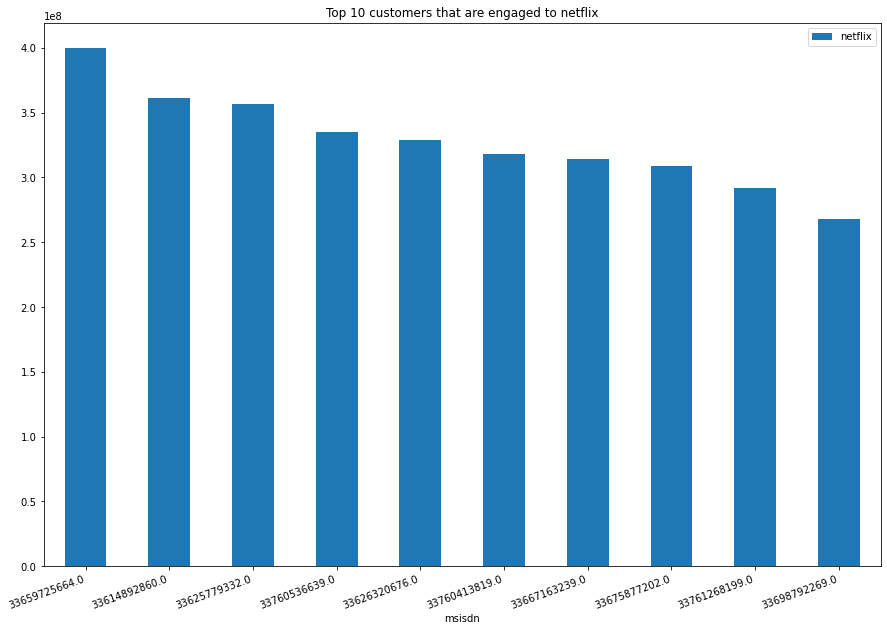

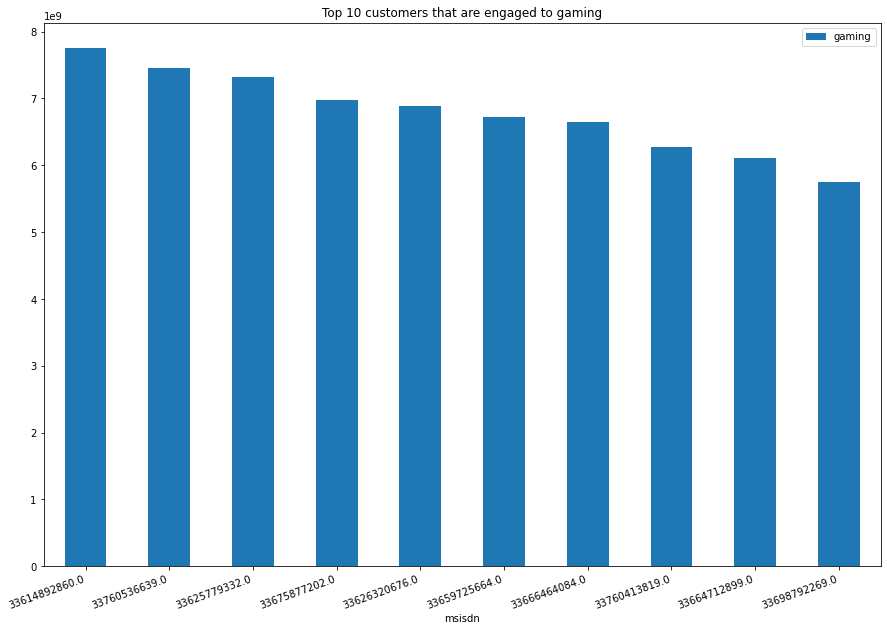

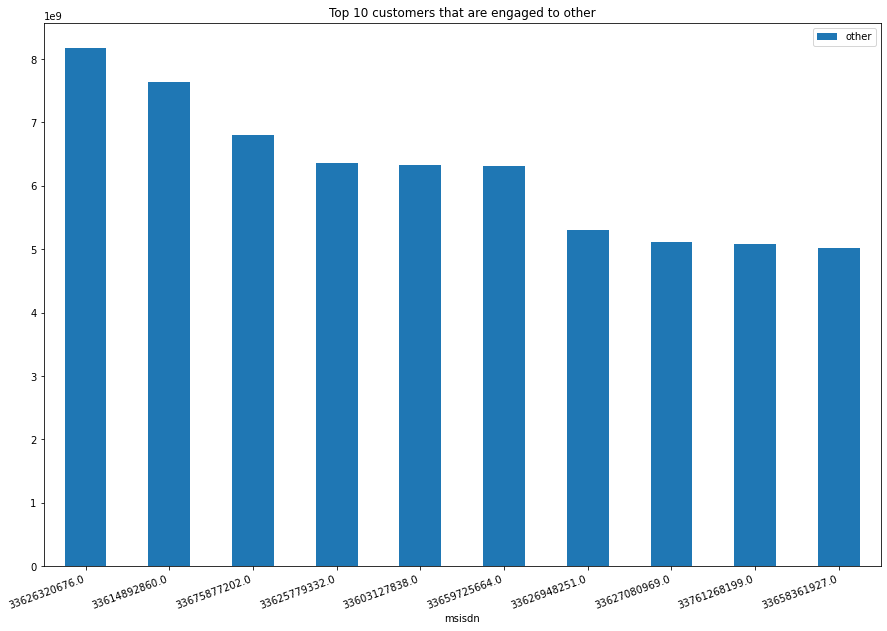

In [30]:
applications_list = ['social_media','google','email','youtube','netflix','gaming','other']

for application in applications_list:
    
    application_aggregate = df.groupby('msisdn').agg({application : 'sum'})
    top_application_users = application_aggregate.sort_values(by=[application], ascending=False).head(10)
    ax = top_application_users.plot.bar(
        y=[application], 
        title=f"Top 10 customers that are engaged to {application}",
        figsize=(15, 10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()

#### Plot the top 3 most used applications using appropriate charts

In [31]:
application_df  = df[['social_media','google','email','youtube','netflix','gaming','other']]

applications_list = ['social_media','google','email','youtube','netflix','gaming','other']

applications_df_for_comparision = pd.DataFrame(columns=['appplication', 'total'])
applications_df_for_comparision['application'] = applications_list

application_totals = [ ]
for application in applications_list:
    application_totals.append(application_df.sum()[application])
applications_df_for_comparision['total'] = application_totals

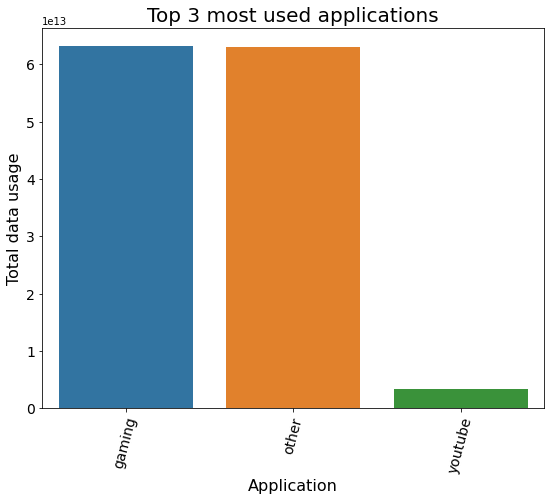

In [32]:
top_three_applications = applications_df_for_comparision.sort_values(by=['total'],
                                  ascending = False).head(3)
plotter.plot_bar(top_three_applications, x_col='application', y_col='total', title="Top 3 most used applications", 
               xlabel="Application", ylabel="Total data usage")

In [33]:
top_three_applications

appplication         total application
5          NaN  6.321529e+13      gaming
6          NaN  6.305541e+13       other
3          NaN  3.325905e+12     youtube

In [34]:
# PIE CHART PLOT OF THE TOP THREE APPLICATIONS
                                        
px.pie(top_three_applications, values="total",
                     names="application", width=700, height=500)

#### >> The plot above shows that gaming is by far the most frequently used application type by customers of the TellCo company. It is also clear that the use of other applications contributes about 48.7 % of the total data consumed by the top three applications featured by the customers of the TellCo company. The third application favored by customers is the Youtube application. 

### Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
####       >> What is the optimized value of k (use elbow method for this)?  
####       >> Interpret your findings. 


In [35]:
inertias = []
for k in range(1, 20):
    
    kmeans_optimization = KMeans(n_clusters=k, init='k-means++').fit(normalized_user_engagement_metrics)
    inertias.append([k, kmeans.inertia_])

In [83]:
inertias

[[1, 0.002369645382827479],
 [2, 0.002369645382827479],
 [3, 0.002369645382827479],
 [4, 0.002369645382827479],
 [5, 0.002369645382827479],
 [6, 0.002369645382827479],
 [7, 0.002369645382827479],
 [8, 0.002369645382827479],
 [9, 0.002369645382827479],
 [10, 0.002369645382827479],
 [11, 0.002369645382827479],
 [12, 0.002369645382827479],
 [13, 0.002369645382827479],
 [14, 0.002369645382827479],
 [15, 0.002369645382827479],
 [16, 0.002369645382827479],
 [17, 0.002369645382827479],
 [18, 0.002369645382827479],
 [19, 0.002369645382827479]]

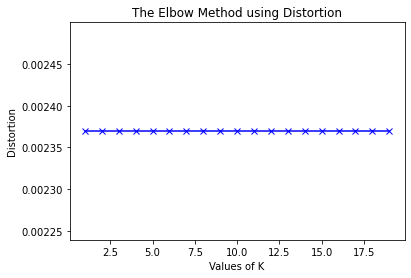

In [37]:
K = [i[0] for i in inertias]
Distortions = [i[1] for i in inertias]
plt.plot(K, Distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [38]:
kmeans_optimized = KMeans(n_clusters=3, init='k-means++').fit(normalized_user_engagement_metrics)
predictions = kmeans_optimized.predict(normalized_user_engagement_metrics)

users_engagement_metrics_with_cluster_new = users_engagement_metrics.copy()
users_engagement_metrics_with_cluster_new['clusters'] = predictions

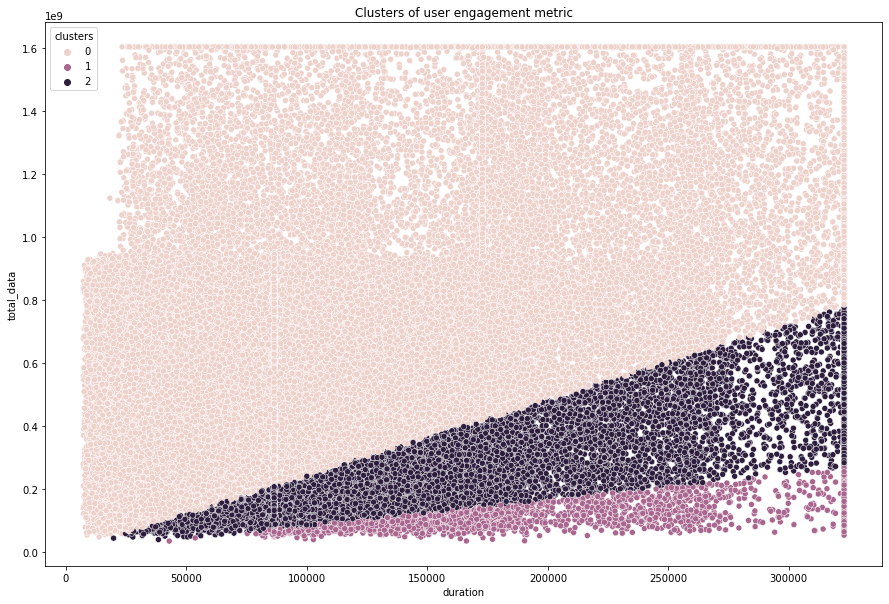

In [39]:
users_engagement_metrics_with_cluster_new['clusters'].value_counts()
plt.figure(figsize=(15,10))

sns.scatterplot(x = 'duration', y='total_data',
                hue='clusters', data=users_engagement_metrics_with_cluster_new).set_title('Clusters of user engagement metric')

plt.show()

In [43]:
# The following code is written to calculate the engaement score of each customer as per the score of the customers

distance = kmeans.fit_transform(normalized_user_engagement_metrics)

distance_from_less_engagement = list(map(lambda x : x[0], distance))

users_engagement_metrics_with_cluster['score'] = distance_from_less_engagement

In [44]:
users_engagement_metrics_with_cluster['msisdn'] = users_engagement_metrics_with_cluster.index
users_engagement_metrics_with_cluster.head()

bearer_id  duration    total_data  cluster     score  \
msisdn                                                               
3.362632e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.361489e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.362578e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.365973e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.367588e+10        3.5  322904.0  1.604259e+09        0  0.000028   

                    msisdn  
msisdn                      
3.362632e+10  3.362632e+10  
3.361489e+10  3.361489e+10  
3.362578e+10  3.362578e+10  
3.365973e+10  3.365973e+10  
3.367588e+10  3.367588e+10

In [45]:
assistant.save_csv(users_engagement_metrics_with_cluster, '../data/user_engagement_with_score.csv')

File Successfully Saved.!!!


bearer_id  duration    total_data  cluster     score  \
msisdn                                                               
3.362632e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.361489e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.362578e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.365973e+10        3.5  322904.0  1.604259e+09        0  0.000028   
3.367588e+10        3.5  322904.0  1.604259e+09        0  0.000028   
...                 ...       ...           ...      ...       ...   
3.366067e+10        1.0   86083.0  8.671079e+08        0  0.000074   
3.366067e+10        1.0   78141.0  7.265688e+08        0  0.000066   
3.366067e+10        1.0  246143.0  7.997736e+08        0  0.000134   
3.366067e+10        1.0  270134.0  2.703397e+08        2  0.000826   
3.370000e+14        1.0  253030.0  5.962878e+08        2  0.000251   

                    msisdn  
msisdn                      
3.362632e+10  3.362632e+10  
3.361489e+10  3.361489e+10  
3.362578e+10  3.362578e+10  
3.365973e+10  3.365973e+10  
3.367588e+10  3.367588e+10  
...                    ...  
3.366067e+10  3.366067e+10  
3.366067e+10  3.366067e+10  
3.366067e+10  3.366067e+10  
3.366067e+10  3.366067e+10  
3.370000e+14  3.370000e+14  

[105719 rows x 6 columns]